# Predicting Car Prices

## Import Data and 1st analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = cols)

In [3]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Select the numeric columns and the target column is the 'Price' column

In [4]:
new_cols = ['symboling', 'normalized-losses', 'wheel-base',
        'length', 'width', 'height', 'curb-weight',
        'engine-size', 'bore', 'stroke', 'compression-rate',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
new_cars = cars[new_cols]

In [6]:
new_cars.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
new_cars = new_cars.replace('?', np.nan)

In [8]:
new_cars = new_cars.dropna()

In [9]:
new_cars = new_cars.reset_index(drop = True)
new_cars = new_cars.astype('float')

In [10]:
price_col = new_cars['price']
new_cars = (new_cars - new_cars.min())/(new_cars.max() - new_cars.min())
new_cars['price'] = price_col

## Create a function and use the function to test univariate models

In [11]:
def knn_train_test(train_name, target_name, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    mid = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    knn.fit(train_df[[train_name]], train_df[target_name])

    labels = knn.predict(test_df[[train_name]])
    
    mse = mean_squared_error(test_df[target_name], labels)
    rmse = np.sqrt(mse)
    
    return rmse

rmse_results = {}
tr_cols = new_cars.columns.drop('price')

for i in tr_cols:
    rmse_val = knn_train_test(i, 'price', new_cars)
    rmse_results[i] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

curb-weight          2390.220625
width                2412.453947
city-mpg             2728.635704
engine-size          2901.870073
horsepower           2929.049689
length               3630.238015
highway-mpg          3769.561703
wheel-base           3934.588779
bore                 4059.664060
symboling            4810.167750
stroke               4962.983985
normalized-losses    5170.826749
height               5226.393339
peak-rpm             5992.944764
compression-rate     6303.123350
dtype: float64

In [12]:
def knn_train_test(train_name, target_name, df):
    
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    mid = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for i in k_values:
        
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_df[[train_name]], train_df[target_name])

        labels = knn.predict(test_df[[train_name]])
    
        mse = mean_squared_error(test_df[target_name], labels)
        rmse = np.sqrt(mse)
        k_rmses[i] = rmse
    
    return k_rmses

k_rmse_results = {}
tr_cols = new_cars.columns.drop('price')

for i in tr_cols:
    k_rmse_val = knn_train_test(i, 'price', new_cars)
    k_rmse_results[i] = k_rmse_val

k_rmse_results

{'bore': {1: 5219.654946689484,
  3: 4235.938102022581,
  5: 4059.6640596852344,
  7: 4002.400681121881,
  9: 4170.186767085684},
 'city-mpg': {1: 4792.334758497156,
  3: 2878.3632376365877,
  5: 2728.6357036988284,
  7: 2757.3981816919295,
  9: 2749.879896928385},
 'compression-rate': {1: 7119.366827534594,
  3: 6410.013216315028,
  5: 6303.123350331961,
  7: 5819.9107169101935,
  9: 5575.3382629207035},
 'curb-weight': {1: 2945.27863919528,
  3: 2555.0087078564375,
  5: 2390.2206252770893,
  7: 2405.4334088025953,
  9: 2390.3598570063996},
 'engine-size': {1: 2892.1370774913144,
  3: 2350.109259575913,
  5: 2901.8700731597205,
  7: 3409.1641829824816,
  9: 3482.3745356189306},
 'height': {1: 6277.936292086755,
  3: 5189.293650820355,
  5: 5226.393339340238,
  7: 5391.5573114455565,
  9: 5526.938089937321},
 'highway-mpg': {1: 3931.1648544038444,
  3: 3576.9725022628345,
  5: 3769.5617029039336,
  7: 3608.0370907481374,
  9: 3520.026777439184},
 'horsepower': {1: 3543.455439256997,
  

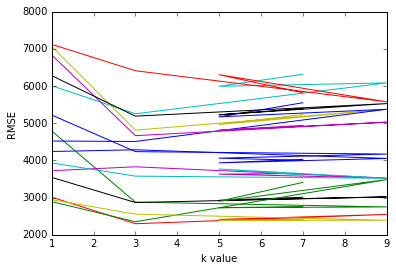

In [13]:
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Get best # features using knn

In [14]:
feature_avg_rmse = {}

tr_cols = new_cars.columns.drop('price')

In [15]:
def knn_train_test(train_name, target_name, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    mid = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
 
    knn = KNeighborsRegressor(n_neighbors = 5)
    knn.fit(train_df[train_name], train_df[target_name])

    labels = knn.predict(test_df[train_name])
    
    mse = mean_squared_error(test_df[target_name], labels)
    rmse = np.sqrt(mse) 
    
    return rmse

k_rmse_results = {}

for i in range(2,6):
    k_rmse_results['{} best features'.format(i)] = knn_train_test(
        tr_cols[:i].tolist(), 'price', new_cars)
k_rmse_results

{'2 best features': 4747.811146096694,
 '3 best features': 3611.4283253997996,
 '4 best features': 3601.6747914685466,
 '5 best features': 3091.9556423888102}

In [16]:
def knn_train_test(train_name, target_name, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    mid = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    k_rmses = {}
    for i in range(1,25):
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_df[train_name], train_df[target_name])

        labels = knn.predict(test_df[train_name])
    
        mse = mean_squared_error(test_df[target_name], labels)
        rmse = np.sqrt(mse) 
        k_rmses[i] = rmse
    return k_rmses

k_rmse_results = {}

for i in range(2,6):
    k_rmse_results['{} best features'.format(i)] = knn_train_test(
        tr_cols[:i].tolist(), 'price', new_cars)
k_rmse_results

{'2 best features': {1: 3996.701977881263,
  2: 4076.217031068758,
  3: 4074.996559473667,
  4: 4517.897469371123,
  5: 4747.811146096694,
  6: 4983.33007420462,
  7: 4907.11944146004,
  8: 4800.696728222601,
  9: 4944.4010665232045,
  10: 4752.764157387783,
  11: 4562.845087198636,
  12: 4483.1919276124045,
  13: 4444.9942256986205,
  14: 4449.42406860519,
  15: 4427.278636237942,
  16: 4334.9493847573585,
  17: 4350.6270703069395,
  18: 4417.130830876909,
  19: 4568.441208965964,
  20: 4641.237857164966,
  21: 4683.32735789255,
  22: 4740.7042205227735,
  23: 4836.836503652683,
  24: 4943.260943533061},
 '3 best features': {1: 3589.6473869309225,
  2: 3540.174050717704,
  3: 3534.193238130089,
  4: 3713.327548338552,
  5: 3611.4283253997996,
  6: 3681.5692681303267,
  7: 3720.690558881373,
  8: 3874.9028212864982,
  9: 3896.66492312954,
  10: 3868.1034713248046,
  11: 3953.071539222997,
  12: 3932.0597877769846,
  13: 3867.753864118342,
  14: 3875.6567304501004,
  15: 3842.9552059435

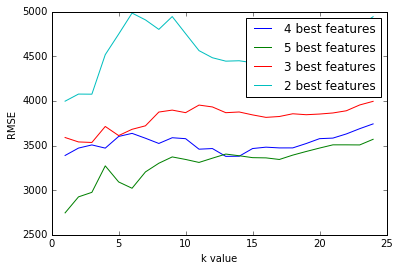

In [17]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()